# Project for Course 3: Sales Analysis
## By John Hamilton

# 1. Data Wrangling

### First we load the data into a DataFrame and take a quick look at the Head of the data

In [297]:
import pandas as pd

# Load the data using Pandas
df = pd.read_excel("1688639662_ausapparalsales4thqrt2020.xlsx")
df.head()


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


### Then we check out our DataFrame's columns

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


### Looks like there are no NULLs in any of the columns, but there are several columns that should be converted to category for efficiency's sake, so let's convert the object columns to categories

In [299]:
df['Time'] = pd.Categorical(df['Time'])
df['State'] = pd.Categorical(df['State'])
df['Group'] = pd.Categorical(df['Group'])

### Here's another way to check to see if there are any columns containing NaN or NULL

In [300]:
def missing_values(df):
        '''This handy function will show us which columns (if any) have NaN or NULL values'''
        nans = df.isna().sum()
        nulls = df.isnull().sum()
        table = pd.concat([nans, nulls], axis=1)
        table = table.rename(columns = {0 : 'NaN Count', 1 : 'NULL Count'})
        return table

# Check the data for missing values
print(missing_values(df))

       NaN Count  NULL Count
Date           0           0
Time           0           0
State          0           0
Group          0           0
Unit           0           0
Sales          0           0


### Looks like there are no missing values, but if there had been, here is what we could have done to impute them using the mean (assuming that the column is numeric and amenable to computation)


In [301]:
# Impute missing values for Sales column
df['Sales'].fillna(int(df['Sales'].mean()), inplace=True)

### Now to normalize the data using the min-max approach

In [302]:
# Apply normalization - the 'Sales' column is the only one amenable to computation
df['Sales_Scaled'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
  
# View normalized data 
print(df.Sales_Scaled)

0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: Sales_Scaled, Length: 7560, dtype: float64


### Now we can group by State and see things like the average Sales for each State
- This is an example of my recommended use of groupby()

In [303]:
# Show the average Sales for each State
df_average = df.groupby(['State'], observed=False)['Sales'].mean()
df_average = df_average.sort_values(ascending=False)
print(df_average)

State
 VIC    97745.370370
 NSW    69416.666667
 SA     54497.685185
 QLD    30942.129630
 TAS    21074.074074
 NT     20907.407407
 WA     20511.574074
Name: Sales, dtype: float64


### What can we learn from this data?
- VIC is doing quite well. We might want to take a look at whatever they are doing right.
- NT, TAS, and WA might need some attention or a specialized marketing program.

### This is not all we can do with this data - we can also do things like group by Day of the Week

In [304]:
# Show the total Sales for each Day of the Week
df_weekday = df.copy()
df_weekday['DayIndex'] = df_weekday['Date'].dt.dayofweek
df_weekday['DayOfWeek'] = df_weekday['Date'].dt.strftime('%A')
df_weekday = pd.DataFrame(df_weekday.groupby(['DayIndex', 'DayOfWeek'])['Sales'].sum())
df_weekday = df_weekday.sort_values(by=['DayIndex'], ascending=True)
print(df_weekday)


                       Sales
DayIndex DayOfWeek          
0        Monday     48050000
1        Tuesday    50327500
2        Wednesday  49945000
3        Thursday   49405000
4        Friday     48000000
5        Saturday   46245000
6        Sunday     48330000


### What can we learn from this data?
- It seems like the sales are distributed quite equally over the weekdays
- Saturday is the worst day for sales - perhaps a promotion or sale on Saturday would help

# 2. Data Analysis

### So let's take a look at the descriptive statistical data for each column

In [305]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,7560,2020-11-15 04:00:00.000000256,2020-10-01 00:00:00,2020-10-23 00:00:00,2020-11-15 12:00:00,2020-12-08 00:00:00,2020-12-30 00:00:00,NaN
Unit,7560.0,18.005423,2.0,8.0,14.0,26.0,65.0,12.901403
Sales,7560.0,45013.558201,5000.0,20000.0,35000.0,65000.0,162500.0,32253.506944
Sales_Scaled,7560.0,0.254054,0.0,0.095238,0.190476,0.380952,1.0,0.204784


### Looks like there are no outliers
### That's good, but we need more info - we can find the mean, median, mode, and standard deviation of the Sales and Unit columns

In [306]:
import statistics

def show_stats(df, col_name):
    '''Handy function for displaying the basic stats of a dataframe column'''
    print(f'{col_name} Mean', statistics.mean(df[col_name]))
    print(f'{col_name} Median', statistics.median(df[col_name]))
    print(f'{col_name} Mode', statistics.mode(df[col_name]))
    print(f'{col_name} StdDev', statistics.stdev(df[col_name]))

show_stats(df, 'Sales')
show_stats(df, 'Unit')


Sales Mean 45013.5582010582
Sales Median 35000.0
Sales Mode 22500
Sales StdDev 32253.506943966073
Unit Mean 18.00542328042328
Unit Median 14.0
Unit Mode 9
Unit StdDev 12.90140277758643


### What can we learn from these descriptive statistics?
- Well, by comparing the mean, median, and mode, we can see that the Sales distribution is positively skewed
- Let's check the skewness using scipy

In [307]:
from scipy.stats import skew
print('Skew:', skew(df['Sales'], axis=0, bias=True))

Skew: 1.0853347546987901


- This confirms the skew is positive

### Now to determine which groups are generating the highest and lowest sales - we can do this using a groupby

In [308]:
# Display the total sales for every group
df_group = df.groupby(['Group'], observed=False)['Sales'].sum()
df_group = df_group.sort_values(ascending=False)
print(df_group)


Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64


### What can we learn from this data?
- Men had the highest sales and Seniors had the lowest
- Even so, it looks like the sales are almost evenly spread across all the groups

### Now to determine which states are generating the highest and lowest sales


In [309]:
# Display the total sales for every state
df_state = df.groupby(['State'], observed=False)['Sales'].sum()
df_state = df_state.sort_values(ascending=False)
print(df_state)


State
 VIC    105565000
 NSW     74970000
 SA      58857500
 QLD     33417500
 TAS     22760000
 NT      22580000
 WA      22152500
Name: Sales, dtype: int64


### What can we learn from this data?
- VIC had the highest sales and WA had the lowest
- The sales per state varies greatly by state
- We might want to find out what VIC is doing well and reproduce that in the other States
- We might check to see what is common to WA, NT, and TAS - perhaps there is a common reason they are so low at the bottom

### Now let's generate Weekly, Monthly, and Quarterly reports

Weekly report of Sales:

In [310]:
df_weekly_report = df.copy()
df_weekly_report['Week'] = df_weekly_report['Date'].dt.to_period("W-MON")
df_weekly_report = df_weekly_report.groupby(by=['Week'])['Sales'].sum()
print(df_weekly_report)

Week
2020-09-29/2020-10-05    18907500
2020-10-06/2020-10-12    26935000
2020-10-13/2020-10-19    26805000
2020-10-20/2020-10-26    26590000
2020-10-27/2020-11-02    20797500
2020-11-03/2020-11-09    21065000
2020-11-10/2020-11-16    21242500
2020-11-17/2020-11-23    21187500
2020-11-24/2020-11-30    21442500
2020-12-01/2020-12-07    30817500
2020-12-08/2020-12-14    32060000
2020-12-15/2020-12-21    31247500
2020-12-22/2020-12-28    32007500
2020-12-29/2021-01-04     9197500
Freq: W-MON, Name: Sales, dtype: int64


Monthly report of Sales:

In [311]:
df_monthly_report = df.copy()
df_monthly_report['Month'] = df_monthly_report['Date'].dt.to_period("M")
df_monthly_report = df_monthly_report.groupby(by=['Month'])['Sales'].sum()
print(df_monthly_report)

Month
2020-10    114290000
2020-11     90682500
2020-12    135330000
Freq: M, Name: Sales, dtype: int64


Quarterly report of Sales:
- Note: we happen to only have data for one quarter, but this code would work for all 4 quarters

In [312]:
df_quarterly_report = df.copy()
df_quarterly_report['Quarter'] = df_quarterly_report['Date'].dt.to_period("Q")
df_quarterly_report = df_quarterly_report.groupby(by=['Quarter'])['Sales'].sum()
print(df_quarterly_report)

Quarter
2020Q4    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


### Now to put them all in one report

In [313]:
df_final_report = df.copy()
df_final_report['Week'] = df_final_report['Date'].dt.to_period("W-MON")
df_final_report['Month'] = df_final_report['Date'].dt.to_period("M")
df_final_report['Quarter'] = df_final_report['Date'].dt.to_period("Q")
df_final_report = df_final_report.groupby(by=['Quarter','Month','Week'])['Sales'].sum()
print(df_final_report)


Quarter  Month    Week                 
2020Q4   2020-10  2020-09-29/2020-10-05    18907500
                  2020-10-06/2020-10-12    26935000
                  2020-10-13/2020-10-19    26805000
                  2020-10-20/2020-10-26    26590000
                  2020-10-27/2020-11-02    15052500
         2020-11  2020-10-27/2020-11-02     5745000
                  2020-11-03/2020-11-09    21065000
                  2020-11-10/2020-11-16    21242500
                  2020-11-17/2020-11-23    21187500
                  2020-11-24/2020-11-30    21442500
         2020-12  2020-12-01/2020-12-07    30817500
                  2020-12-08/2020-12-14    32060000
                  2020-12-15/2020-12-21    31247500
                  2020-12-22/2020-12-28    32007500
                  2020-12-29/2021-01-04     9197500
Name: Sales, dtype: int64


### What can we learn from this report?
- Sales were highest on Halloween, right after Thanksgiving, and right after Christmas
- The periods just before Christmas and Thanksgiving were also very successful
- Competition for customer purchases is very high during the periods of highest sales - perhaps we should have some additional sales or promotions for these periods to make them even more lucrative and take advantage of the large population of shoppers
- The data supplied is only for one quarter, but if we are to look at only one quarter, this is the best one to look at because of the importance of the Fall/Christmas season for sales

# 3. Data Visualization

### Create a Dashboard with the following graphs:
1. State-wise sales analysis for different groups (kids, women, men, and seniors) 
2. Group-wise sales analysis (kids, women, men, and seniors) across different states
3. Use box plot for descriptive statistics per Group
4. Use box plot for descriptive statistics per Time of Day
5. Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest
6. Sales vs Time over Daily, Weekly, Monthly, and Quarterly intervals

- Note: We will use Seaborn for graphing, since it turns out to be the easiest to use and has very intuitive methods for graphing 2 dimensions plus a Hue

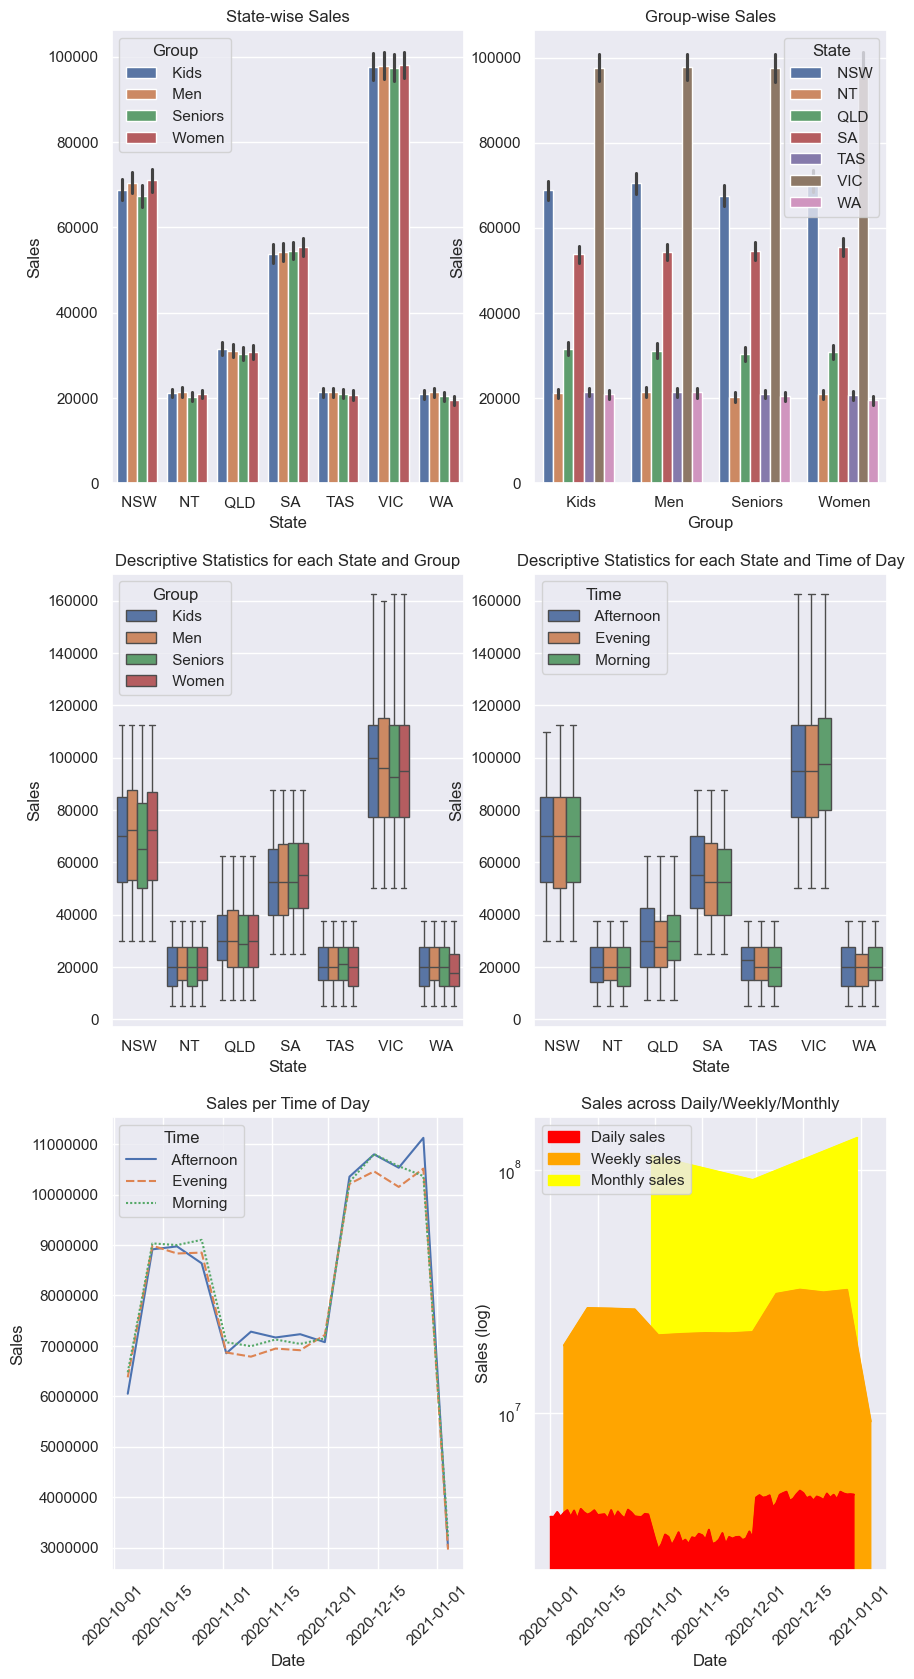

In [314]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

# Set up our dashboard
sns.set_theme()
f = plt.figure(figsize=(10,20))

# Plot graph (1)
ax = f.add_subplot(3,2,1)
sns.barplot(x='State', y='Sales', data=df, hue='Group', ax=ax)
plt.title('State-wise Sales')

# Plot graph (2)
ax = f.add_subplot(3,2,2)
sns.barplot(x='Group', y='Sales', data=df, hue='State', ax=ax)
plt.title('Group-wise Sales')

# Plot graph (3)
ax = f.add_subplot(3,2,3)
sns.boxplot(data=df, x="State", y="Sales", hue="Group", ax=ax)
plt.title('Descriptive Statistics for each State and Group')

# Plot graph (4)
ax = f.add_subplot(3,2,4)
sns.boxplot(data=df, x="State", y="Sales", hue="Time", ax=ax)
plt.title('Descriptive Statistics for each State and Time of Day')

# Plot graph (5)
# Note: Here we are using the "resample" method to set the Date column to weeks
df_tod = df.groupby('Time', observed=False).resample('W-Mon', on='Date')['Sales'].sum().reset_index().sort_values(by='Date')
ax = f.add_subplot(3,2,5)
sns.lineplot(x='Date', y='Sales', data=df_tod, hue='Time', style='Time', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks(rotation=45)
plt.title('Sales per Time of Day')

# Plot graph (6) - with logarithmic y-axis for easier readability
# Note: Quarterly line-plot has been excluded since it only has one value (the data is only for one quarter)
ax = f.add_subplot(3,2,6)
df_daily_report = df.groupby(by=['Date'])['Sales'].sum()
ax.set(yscale="log")
sns.lineplot(x="Date", y="Sales", color='red', data=pd.DataFrame(df_daily_report), ax=ax)
sns.lineplot(x="Week", y="Sales", color='orange', data=pd.DataFrame(df_weekly_report), ax=ax)
sns.lineplot(x="Month", y="Sales", color='yellow', data=pd.DataFrame(df_monthly_report), ax=ax)
line = plt.gca().lines
ax.fill_between(line[2].get_xdata(), 0, line[2].get_ydata(), color='yellow', alpha=1)
ax.fill_between(line[1].get_xdata(), 0, line[1].get_ydata(), color='orange', alpha=1)
ax.fill_between(line[0].get_xdata(), 0, line[0].get_ydata(), color='red', alpha=1)
red_patch = mpatches.Patch(color='red', label='Daily sales')
orange_patch = mpatches.Patch(color='orange', label='Weekly sales')
yellow_patch = mpatches.Patch(color='yellow', label='Monthly sales')
plt.legend(handles=[red_patch, orange_patch, yellow_patch])
plt.xticks(rotation=45)
plt.ylabel('Sales (log)')
plt.title('Sales across Daily/Weekly/Monthly')

plt.show()


### What can we learn from the graphs in our dashboard?
- Sales are very evenly spread across Groups
- Sales very greatly by State, with VIC way ahead of the other States
- A number of the States are doing poorly (comparatively), so something should probably be done about that
- It looks like Sales are distributed very evenly across Time of Day
- The descriptive statistics vary much according to State, but not much by Group or Time of Day
- Overall Sales were trending up in October, down in November, and back up in December